In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#SKlearn for machine learning
from sklearn.model_selection import train_test_split #splits test and train data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
from sklearn.naive_bayes import MultinomialNB
import string

In [2]:
# Original dataset URL: https://www.uvic.ca/ecs/ece/isot/datasets/fake-news/index.php
url_fake = 'https://raw.githubusercontent.com/SamratDuttaOfficial/TrueAndFakeNews/master/Fake.csv'
url_true = 'https://raw.githubusercontent.com/SamratDuttaOfficial/TrueAndFakeNews/master/True.csv'
df_fake = pd.read_csv(url_fake)
df_true = pd.read_csv(url_true)

In [3]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
df_fake['true'] = 0
df_true['true'] = 1
frames = [df_true, df_fake]
df = pd.concat(frames)

In [6]:
df = df.sample(frac = 1).reset_index() # shuffle the true and fake

In [7]:
df['title_length']=df['title'].apply(len)
df['text_length']=df['text'].apply(len)

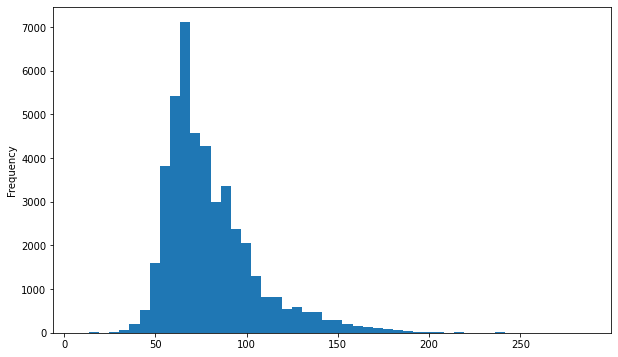

In [8]:
df['title_length'].plot(bins=50,kind='hist',figsize=(10,6))

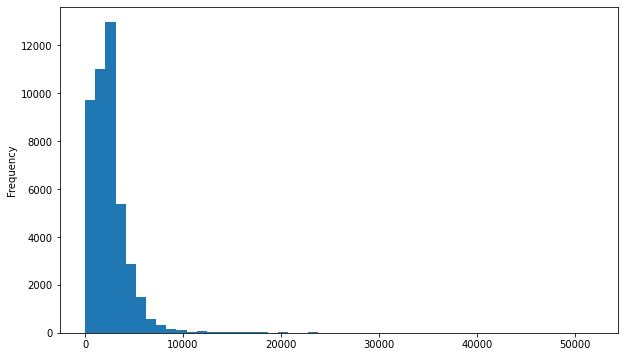

In [9]:
df['text_length'].plot(bins=50,kind='hist',figsize=(10,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f25ac156a90>,
      dtype=object)

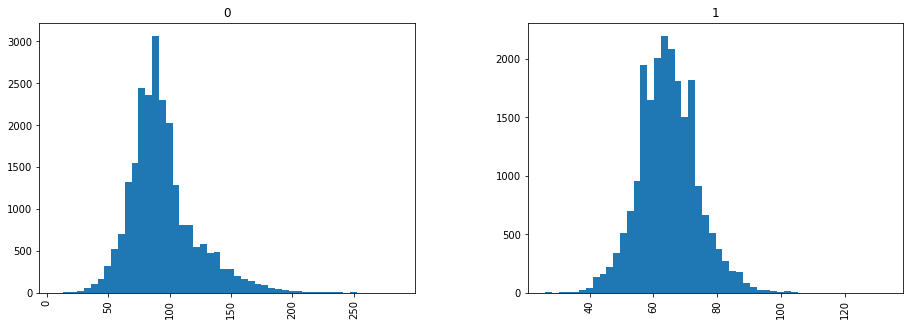

In [10]:
df.hist(column='title_length', by='true', bins=50,figsize=(15,5))

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

def GetVocabulary(data): 
    vocab_set = set([])
    for document in data:
        words = document.split()
        for word in words:
            vocab_set.add(word) 
    return list(vocab_set)

In [13]:
text = df['text'].copy()

In [14]:
vocab_list = GetVocabulary(text)
print ('Number of all the unique words in data: ' + str(len(vocab_list)))

Number of all the unique words in data: 397481


In [15]:
#vectorization of text using countvectorizer
text = text.apply(text_process)
features = tv.fit_transform(text)

In [16]:
features_train, features_test, labels_train, labels_test = train_test_split(features, df['true'], test_size=0.2, random_state=111)

In [18]:
mnb = MultinomialNB(alpha=0.2)

In [19]:
#train dataset 1
start_time = time.time()
mnb.fit(features_train, labels_train) #data is fit to the model
#clf.score(features1_test, labels1_test)
end_time=time.time()
time_taken = end_time - start_time

# Evaluate the model on the training data set 1
pred = mnb.predict(features_train)
accuracy_score_train = accuracy_score(labels_train, pred)

# Evaluate the model on the test data set 1
pred = mnb.predict(features_test)
accuracy_score_test = accuracy_score(labels_test, pred)


In [21]:
accuracy_score_train

0.972047441394287

In [22]:
accuracy_score_test

0.9589086859688196

In [23]:
time_taken

0.07765555381774902